In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msn
import dexplot as dxp

In [19]:
train = pd.read_csv('/content/drive/MyDrive/training_set_VU_DM.csv', sep=",", header=0)

In [20]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [15]:
import numpy as np
from scipy.stats import spearmanr

In [16]:

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

In [12]:

train = dd.read_csv("/content/drive/MyDrive/training_set_VU_DM.csv", sep=",", header=0, engine='python')


In [21]:
to_drop= ['comp1_rate',
'comp1_inv',
'comp1_rate_percent_diff',
'comp2_rate',
'comp2_inv',
'comp2_rate_percent_diff',
'comp3_rate',
'comp3_inv',
'comp3_rate_percent_diff',
'comp4_rate',
'comp4_inv',
'comp4_rate_percent_diff',
'comp5_rate',
'comp5_inv',
'comp5_rate_percent_diff',
'comp6_rate',
'comp6_inv',
'comp6_rate_percent_diff',
'comp7_rate',
'comp7_inv',
'comp7_rate_percent_diff',
'comp8_rate',
'comp8_inv',
'comp8_rate_percent_diff'

]

#train['outcome'] = pd.Series(train['booking_bool']> 0, 500 + train['position'] , train['click_bool']> 0, 100 +train['position'] , 0 + train['position'] )

conditions = [
    #(train['booking_bool']> 0),
    (train['click_bool']> 0)
]

#choices = [500+(40 - train['position']) ,100+(40 - train['position'])]
#train['outcome'] = np.select(conditions, choices, default=(40 - train['position'])

#choices = [2 ,1]
choices = [1]
train['outcome'] = np.select(conditions, choices, default=0)

train = train.drop(to_drop,  axis=1)#.sample(frac=0.2, replace=True, random_state=1)
#test_reduced  = test.iloc[: , :N].sample(frac=0.33, replace=True, random_state=1)
train = train[train.price_usd < 3001]

In [22]:
train['price_bin'] = pd.qcut(train['price_usd'], q=80, precision=0)
train['mean_price_bin_star'] = train.groupby('price_bin')['prop_starrating'].transform('mean')
train['mean_price_bin_review'] = train.groupby('price_bin')['prop_review_score'].transform('mean')
train['prop_review_score'] = train['prop_review_score'].fillna(0)
train.loc[train.prop_review_score == 0, "prop_review_score"] = train.mean_price_bin_review
train.loc[train.prop_starrating == 0, "prop_starrating"] = train.mean_price_bin_star



In [23]:
train['max_price'] = train.groupby('srch_id')['price_usd'].transform('max') 
train['min_price'] = train.groupby('srch_id')['price_usd'].transform('min') 
train['mean_price'] = train.groupby('srch_id')['price_usd'].transform('mean') 
train['diff_max_price'] =(train['max_price'] -train['price_usd']) / train['price_usd']
train['diff_min_price'] = (train['min_price'] - train['price_usd'])/ train['price_usd']
train['diff_min_price'] = train['diff_min_price'].replace(np.nan, 0)
train['diff_mean_price'] = (train['mean_price'] - train['price_usd']) / train['price_usd']
train['price_review_value'] =  train['prop_review_score'] /train['mean_price_bin_review'] 


In [24]:
train['hotel_click_prob'] = train.groupby('prop_id')['click_bool'].transform('sum') / train.groupby('prop_id')['click_bool'].transform('count')
train['hotel_click_prob'] = train.groupby('prop_id')['click_bool'].transform('sum') / train.groupby('prop_id')['click_bool'].transform('count')
train['hotel_show_prob'] =  train.groupby('prop_id')['prop_id'].transform('count') / train.groupby('srch_id')['prop_id'].transform('count')
#pd.crosstab(train.hotel_click_prob, train.prop_id, dropna=False)



In [57]:
train['promo_value'] = np.where(((train['promotion_flag'] == 1) & (train['prop_starrating'] <= 2)), 1, 0)
train['promo_price_con'] = np.where(((train['promotion_flag'] == 1) & (train['price_usd'] <= train['mean_price'])), 1, 0)
#train['evaluate_starr'] = np.where(train['visitor_hist_starrating'] >= train['prop_starrating'], 1, 0) #visitor_hist_starrating has so many NaN

In [58]:
train['hotel_buy_prob'] = train.groupby('prop_id')['booking_bool'].transform('sum') / train.groupby('prop_id')['booking_bool'].transform('count')
#pd.crosstab(train.hotel_buy_prob, train.prop_id, dropna=False)


In [59]:
train['outcome'].value_counts()


0    4732797
1     221696
Name: outcome, dtype: int64

In [60]:
train_reduced = train.groupby('outcome')
train_reduced = pd.DataFrame(train_reduced.apply(lambda x: x.sample(train_reduced.size().min()).reset_index(drop=True)))

In [ ]:
# conditions = [
#     (train['booking_bool']> 0),
#     (train['click_bool']> 0)
# ]

# choices = [500+train['position'],100+train['position'], train['position']]
# train['outcome'] = np.select(conditions, choices, default=train['position'])

In [61]:
train_reduced.isnull().mean() * 100

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.939241
visitor_hist_adr_usd           94.917590
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.000000
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           17.281773
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

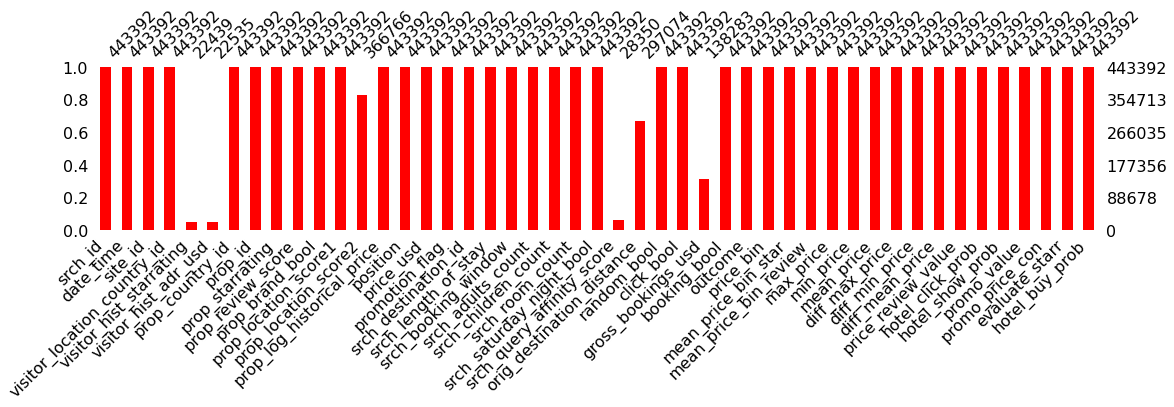

In [62]:
msn.bar(train_reduced,figsize=(18,3), color='red')

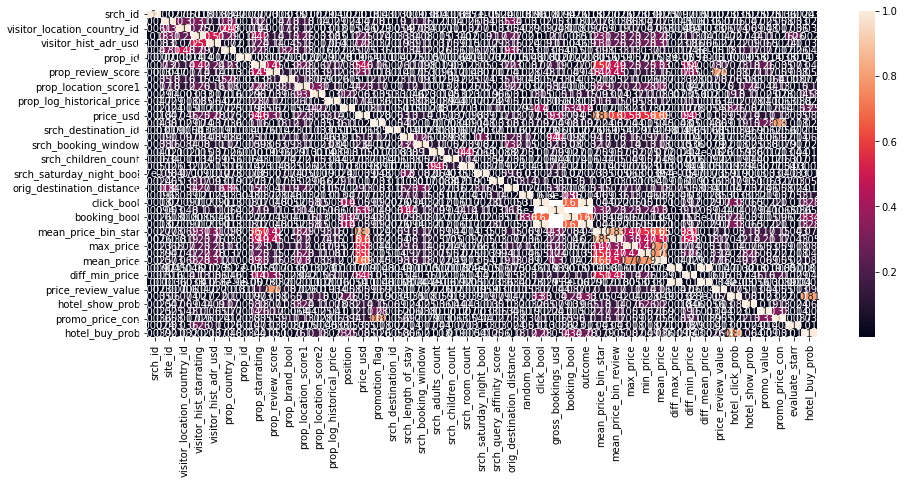

In [63]:
plt.figure(figsize=(15, 6))
sns.heatmap(train_reduced.corr().abs(),  annot=True)

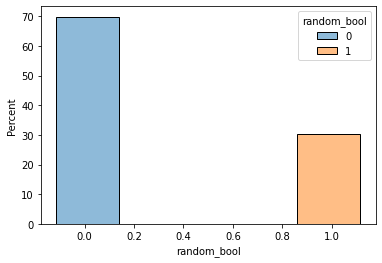

In [64]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'] ,
                  stat = 'percent', shrink =10, common_norm=True)

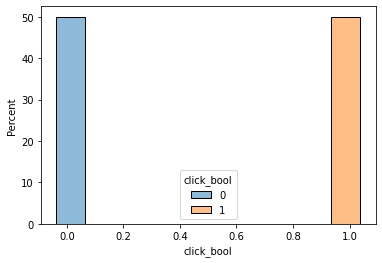

In [65]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['click_bool'], hue=train_reduced['click_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)

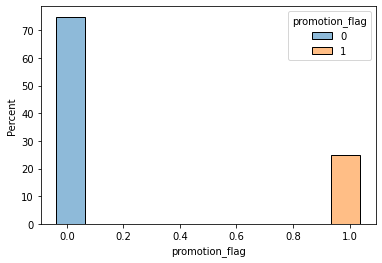

In [66]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['promotion_flag'], hue=train_reduced['promotion_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [35]:
# train_reduced['bought_flag'] = np.where(train_reduced['gross_bookings_usd']> 0, 1, 0)

# ax = sns.histplot(x = train_reduced['bought_flag'], hue=train_reduced['bought_flag'] ,
#                   stat = 'percent', shrink =4,common_norm=True)


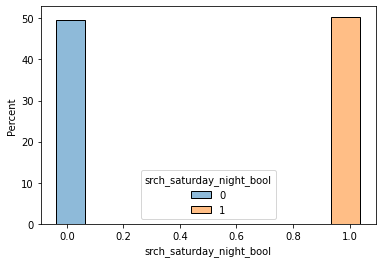

In [67]:


ax = sns.histplot(x = train_reduced['srch_saturday_night_bool'], hue=train_reduced['srch_saturday_night_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)


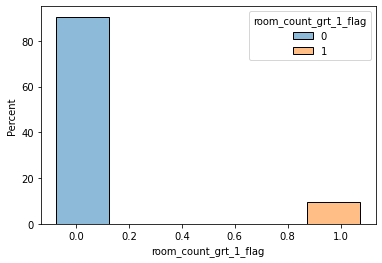

In [68]:
train_reduced['room_count_grt_1_flag'] = np.where(train_reduced['srch_room_count']> 1, 1, 0)

ax = sns.histplot(x = train_reduced['room_count_grt_1_flag'], hue=train_reduced['room_count_grt_1_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [ ]:
# df = train_reduced.loc[(train_reduced['gross_bookings_usd'] >= 0) & (train_reduced['gross_bookings_usd'] <= 1000)]
# sns.kdeplot(df['gross_bookings_usd'])
# plt.show()

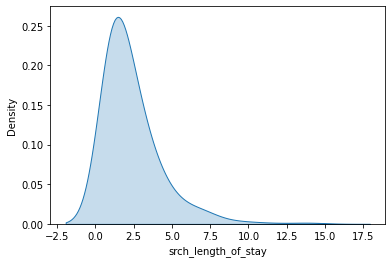

In [69]:
df = train_reduced.loc[(train_reduced['srch_length_of_stay'] >= 0) & (train_reduced['srch_length_of_stay'] <= 15)]
sns.kdeplot(df['srch_length_of_stay'], shade=True, bw_adjust=7)
plt.show()

In [70]:
train_reduced = train_reduced.loc[(train_reduced['random_bool'] == 0)]

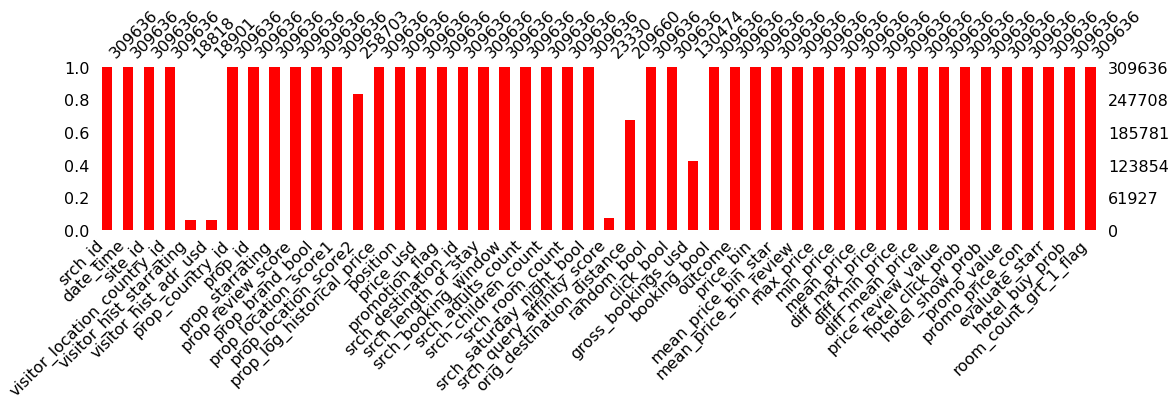

In [71]:

msn.bar(train_reduced,figsize=(18,3), color='red')

In [72]:
to_drop = ['srch_id','site_id', 'date_time', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_brand_bool', 'orig_destination_distance', 'click_bool', 'room_count_grt_1_flag', 'random_bool', 'booking_bool', 'srch_destination_id', 'position', 'prop_location_score2'
          ,'gross_bookings_usd', 'price_usd', 'max_price','min_price', 'mean_price', 'mean_price_bin_review','mean_price_bin_star', 'price_bin', 'promo_value', 'promo_price_con' ] 

train1 = train_reduced.drop(to_drop,  axis=1)

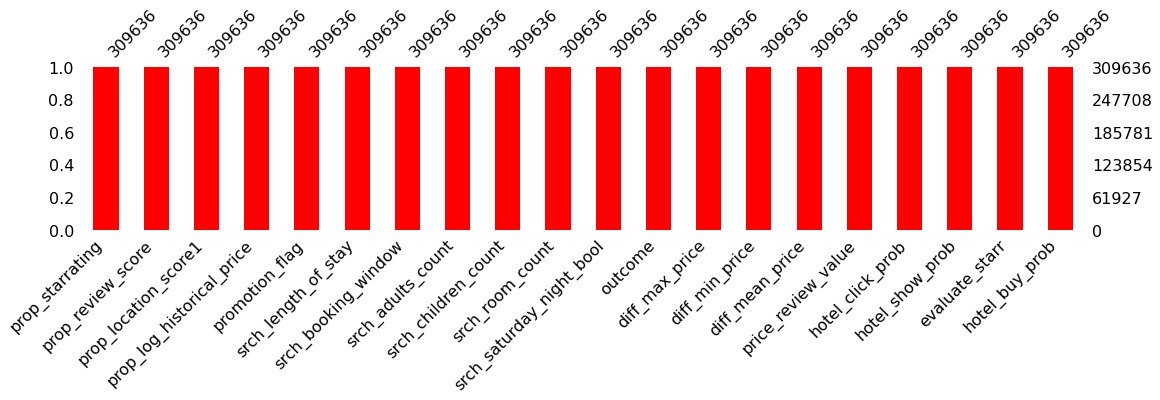

In [73]:
train1.replace([np.inf, -np.inf], 0, inplace=True)

train1=train1.dropna(axis=1,how="any")
msn.bar(train1,figsize=(18,3), color='red')

In [74]:
train1 = train1[['prop_starrating', 'prop_location_score1','prop_log_historical_price','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool', 'hotel_click_prob', 'hotel_buy_prob','diff_max_price','diff_min_price','diff_mean_price','hotel_show_prob', 'prop_starrating', 'prop_review_score','price_review_value', 'outcome']]

In [87]:
#train1.reset_index()
X = train1.iloc[:, :-1].values
y = train1.iloc[:, -1].values

In [88]:
train1.head(20)



prop_starrating  prop_location_score1  prop_log_historical_price  \
outcome                                                                        
0       0          3.000000                  1.10                       4.95   
        1          3.181616                  1.61                       4.58   
        2          4.000000                  5.15                       0.00   
        3          2.289288                  0.69                       4.81   
        4          4.000000                  4.71                       5.58   
        5          5.000000                  3.78                       5.73   
        7          4.000000                  5.26                       5.11   
        8          3.000000                  2.08                       5.15   
        9          5.000000                  4.44                       5.26   
        10         3.000000                  3.66                       4.85   
        12         4.000000                  1.10                       5.27   
        14         5.000000                  4.23                       0.00   
        15         3.000000                  5.24                       0.00   
        17         3.000000                  1.39                       4.51   
        19         5.000000                  4.62                       5.68   
        20         4.000000                  5.11                       5.74   
        21         4.000000                  3.71                       5.94   
        23         4.000000                  2.48                       5.30   
        24         3.000000                  3.47                       4.79   
        25         2.000000                  0.69                       4.27   

            promotion_flag  srch_length_of_stay  srch_booking_window  \
outcome                                                                
0       0                0                    2                   10   
        1                0                    2                   53   
        2                1                    2                   58   
        3                0                    4                    5   
        4                0                    7                   23   
        5                0                    1                   19   
        7                1                    5                   42   
        8                0                    4                   47   
        9                0                    6                   46   
        10               1                    2                    5   
        12               0                    2                   28   
        14               0                    4                    4   
        15               0                    3                    3   
        17               0                    2                    0   
        19               0                    4                    0   
        20               0                    2                    4   
        21               1                    5                   26   
        23               0                    1                    3   
        24               0                    1                   24   
        25               0                    1                   13   

            srch_adults_count  srch_children_count  srch_room_count  \
outcome                                                               
0       0                   2                    0                1   
        1                   2                    0                1   
        2                   2                    1                1   
        3                   2                    0                1   
        4                   2                    0                1   
        5                   2                    0                1   
        7                   2                    0                1   
        8                  

In [89]:
models_list=[
    LogisticRegression(),
    #Lasso(),
    RandomForestClassifier(criterion='entropy', min_samples_leaf=60,
                       min_samples_split=4, random_state=16),
    GradientBoostingClassifier(),
    lgb.LGBMClassifier(),
    LinearSVC(random_state=42, C=0.01),
    #xgb.XGBRegressor(objective="reg:linear", random_state=42)   
  #  xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.1), 
    xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.05), #better. 
  #  xgb.XGBClassifier(objective="binary:logistic", random_state=0, eval_metric="auc", n_estimators=100, max_depth=6,learning_rate=0.01), 
    #  "multi:softprob"
]

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [91]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
import warnings
warnings.filterwarnings('ignore')

l=[]
for model in models_list:
    #clf=clf_models(model)
    print(model)
    fit_model=model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    print("model score: %.3f" % score)
    l.append([model,'clf', score, X_test, y_test])
    #print(clf)
    #scores = -1 * cross_val_score(clf, X, y,cv=5,scoring='neg_mean_absolute_error')
    #print("MAE scores:\n", scores.mean(), scores.sum(), scores.min())
    
#print(l[3][4])
#print(l[2][3])
#print(l[2][0])

LogisticRegression()
model score: 0.651
RandomForestClassifier(criterion='entropy', min_samples_leaf=60,
                       min_samples_split=4, random_state=16)
model score: 0.712
GradientBoostingClassifier()
model score: 0.711
LGBMClassifier()
model score: 0.715
LinearSVC(C=0.01, random_state=42)
model score: 0.693
XGBClassifier(eval_metric='auc', learning_rate=0.05, max_depth=6)
model score: 0.711


In [92]:
y_pred=l[1][0].predict(X_test)

print(y_pred)

y_pred[:5]

[1 0 0 ... 1 0 0]


array([1, 0, 0, 1, 1])

In [93]:
predictors = ['prop_starrating', 'prop_location_score1','prop_log_historical_price','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool', 'hotel_click_prob', 'hotel_buy_prob', 'diff_max_price','diff_min_price','diff_mean_price', 'hotel_show_prob', 'prop_starrating', 'prop_review_score','price_review_value']

In [94]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), l[1][0].feature_importances_), predictors), reverse=True))

Features sorted by their score:
[(0.3773, 'hotel_buy_prob'), (0.3551, 'hotel_click_prob'), (0.047, 'diff_mean_price'), (0.0453, 'diff_min_price'), (0.0442, 'hotel_show_prob'), (0.0238, 'diff_max_price'), (0.019, 'price_review_value'), (0.0174, 'prop_log_historical_price'), (0.0159, 'prop_location_score1'), (0.0135, 'srch_booking_window'), (0.0082, 'promotion_flag'), (0.0072, 'prop_starrating'), (0.007, 'prop_review_score'), (0.0069, 'prop_starrating'), (0.0047, 'srch_length_of_stay'), (0.0024, 'srch_saturday_night_bool'), (0.0024, 'srch_children_count'), (0.0021, 'srch_adults_count'), (0.0008, 'srch_room_count')]


In [95]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    l[1][0], X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=predictors)

Elapsed time to compute the importances: 63.095 seconds


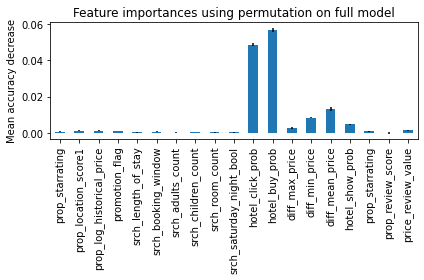

In [96]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [97]:
print(y_test)

[1 0 1 ... 1 0 1]


In [98]:
result = pd.DataFrame(y_test, columns=['actual'])
predicted= pd.DataFrame(y_pred, columns=['predicted'])

df = pd.DataFrame(X_test)



In [99]:
df['result'] = result
df['perdicted'] = predicted

In [100]:
df.to_csv('results1.csv') 

In [101]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,result,perdicted
0,3.0,1.79,4.78,1.0,1.0,6.0,2.0,0.0,1.0,0.0,...,0.138462,1.685393,-0.573034,0.117626,2.031250,3.0,4.5,1.179284,1,1
1,3.0,3.53,0.00,0.0,1.0,1.0,2.0,0.0,1.0,1.0,...,0.007519,1.514620,-0.549708,-0.080775,12.468750,3.0,4.5,1.148524,0,0
2,3.0,2.48,5.02,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.025974,0.303030,-0.494949,-0.146168,2.264706,3.0,4.5,1.140573,1,0
3,3.0,2.30,4.40,1.0,1.0,159.0,2.0,0.0,1.0,0.0,...,0.033708,2.358870,-0.205141,0.390384,7.628571,3.0,3.5,1.099714,0,1
4,3.0,2.64,4.96,0.0,4.0,3.0,1.0,0.0,1.0,1.0,...,0.100000,10.179915,-0.325795,0.463689,2.666667,3.0,4.0,1.092947,1,1
